In [17]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
import numpy as np

In [18]:
df = pd.read_csv('Data/creditcard.csv')
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
col_names = df.columns[1:29]
col_names.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype=object)

In [21]:
colNames = []
for name in col_names:
    colNames.append(name)
colNames.append('Class')
colNames

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Class']

In [22]:
anomaly_inputs = colNames
anomaly_inputs

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Class']

In [23]:
model_IF = IsolationForest(contamination=float(0.1),random_state=42)

In [24]:
anomaly_df = df
model_IF.fit(anomaly_df[anomaly_inputs])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [25]:
anomaly_df['anomaly_scores'] = model_IF.decision_function(anomaly_df[anomaly_inputs])
anomaly_df['anomaly'] = model_IF.predict(anomaly_df[anomaly_inputs])

In [26]:
anomaly_df.loc[:, ['V1', 'Class','anomaly_scores','anomaly'] ]

V1  Class  anomaly_scores  anomaly
0       -1.359807      0        0.072881        1
1        1.191857      0        0.088630        1
2       -1.358354      0        0.002985        1
3       -0.966272      0        0.044849        1
4       -1.158233      0        0.077002        1
...           ...    ...             ...      ...
284802 -11.881118      0       -0.189569       -1
284803  -0.732789      0        0.035931        1
284804   1.919565      0        0.038150        1
284805  -0.240440      0        0.033789        1
284806  -0.533413      0        0.081026        1

[284807 rows x 4 columns]

KeyboardInterrupt: 

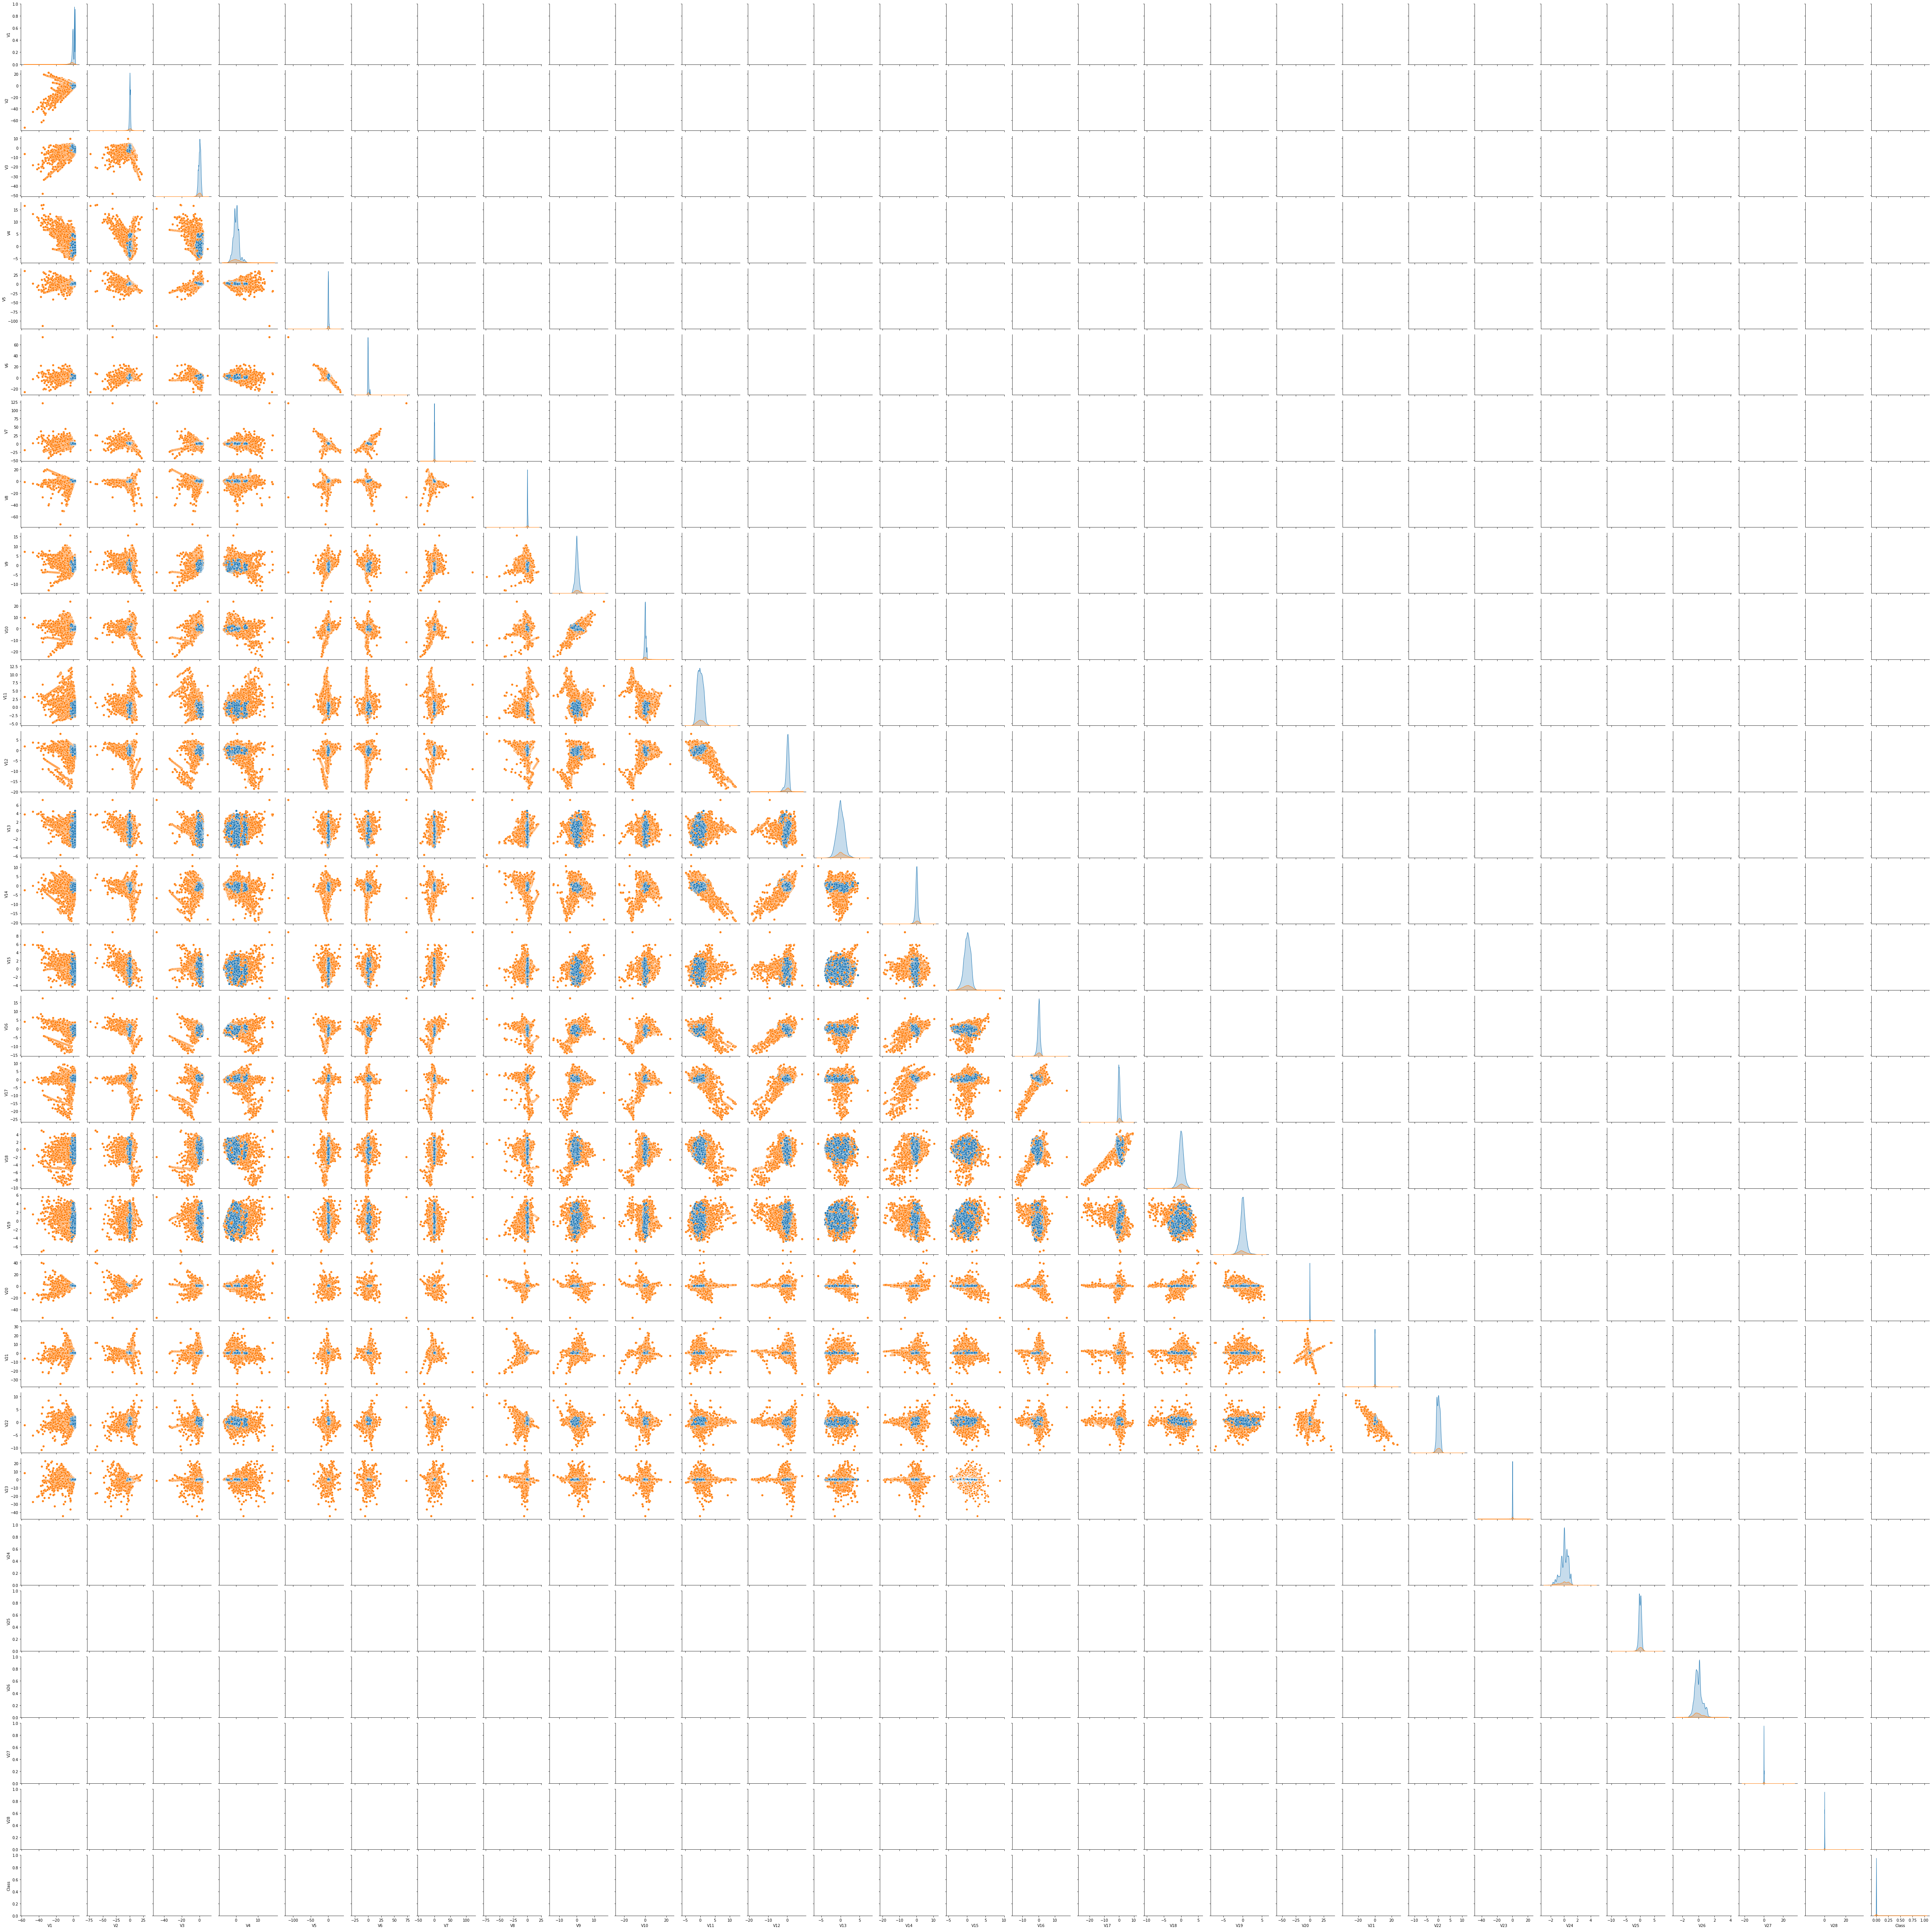

In [27]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(anomaly_df, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [31]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'
    
    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 28473
Number of non anomalous values  256334
Total Number of Values: 284807


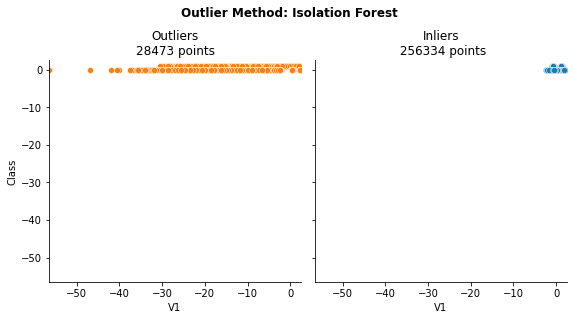

In [32]:
outlier_plot(anomaly_df, 'Isolation Forest', 'V1', 'Class', [anomaly_df['V1'].min(), anomaly_df['V1'].max()], [anomaly_df['V1'].min(), anomaly_df['V1'].max()]);

In [27]:
col_names = df.columns[1:29]
col_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [33]:
def calculate_for_colname(col_name, dataFrame):
    anomaly_inputs = [col_name, 'Class']
    model_IF.fit(dataFrame[anomaly_inputs])
    dataFrame['anomaly_scores'] = model_IF.decision_function(dataFrame[anomaly_inputs])
    dataFrame['anomaly'] = model_IF.predict(dataFrame[anomaly_inputs])
    min_value = dataFrame[col_name].min()
    max_value = dataFrame[col_name].max()
    outlier_plot(dataFrame, 'Isolation Forest', col_name, 'Class', [min_value, max_value], [min_value ,max_value]);

In [29]:
print(df['V1'].min(), df['V1'].max())

-56.407509631329 2.45492999121121


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28473
Number of non anomalous values  256334
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28441
Number of non anomalous values  256366
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28466
Number of non anomalous values  256341
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28405
Number of non anomalous values  256402
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28462
Number of non anomalous values  256345
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28426
Number of non anomalous values  256381
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28459
Number of non anomalous values  256348
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28465
Number of non anomalous values  256342
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28440
Number of non anomalous values  256367
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28473
Number of non anomalous values  256334
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28465
Number of non anomalous values  256342
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28479
Number of non anomalous values  256328
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28412
Number of non anomalous values  256395
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28461
Number of non anomalous values  256346
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28454
Number of non anomalous values  256353
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28473
Number of non anomalous values  256334
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28479
Number of non anomalous values  256328
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28481
Number of non anomalous values  256326
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28456
Number of non anomalous values  256351
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28443
Number of non anomalous values  256364
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28468
Number of non anomalous values  256339
Total Number of Values: 284807


C:\Python310\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28481
Number of non anomalous values  256326
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28480
Number of non anomalous values  256327
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28419
Number of non anomalous values  256388
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28453
Number of non anomalous values  256354
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28439
Number of non anomalous values  256368
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28403
Number of non anomalous values  256404
Total Number of Values: 284807


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 28454
Number of non anomalous values  256353
Total Number of Values: 284807


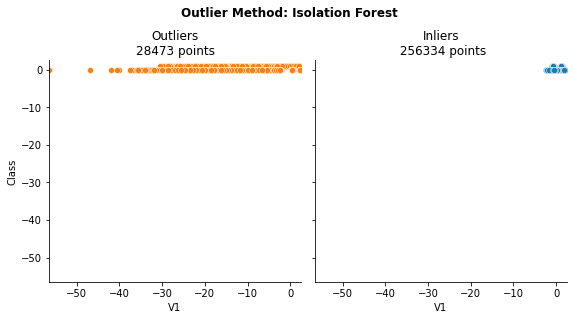

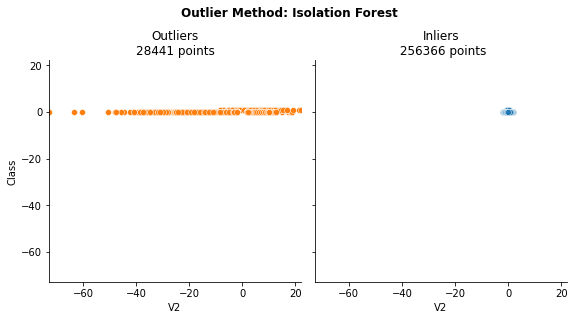

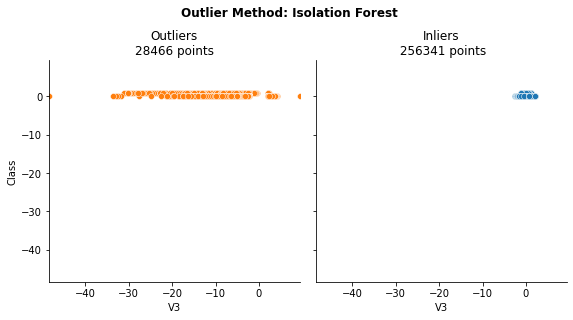

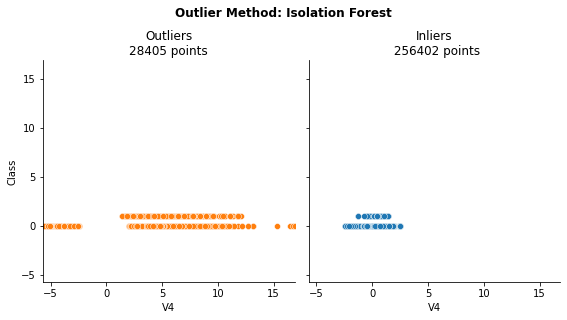

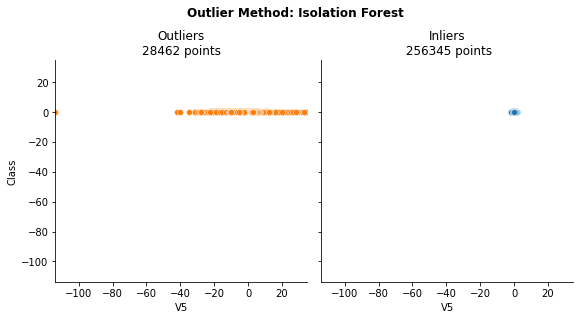

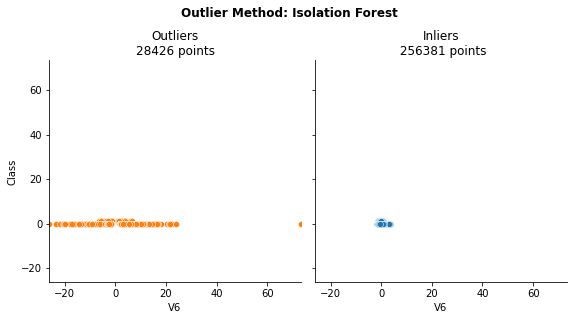

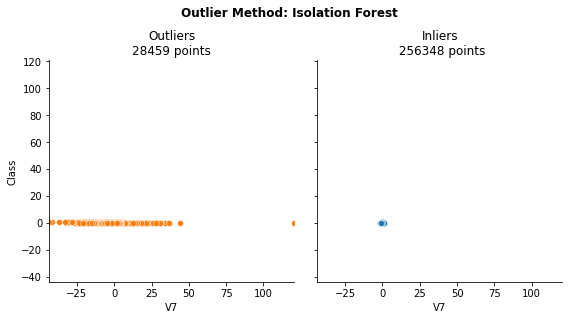

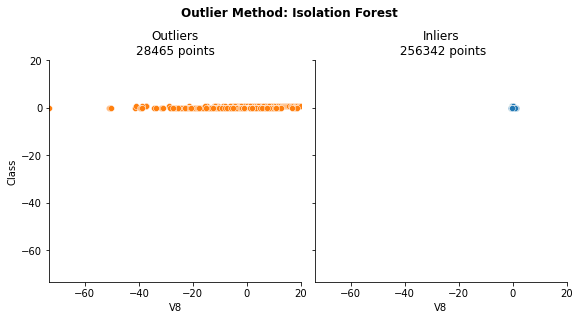

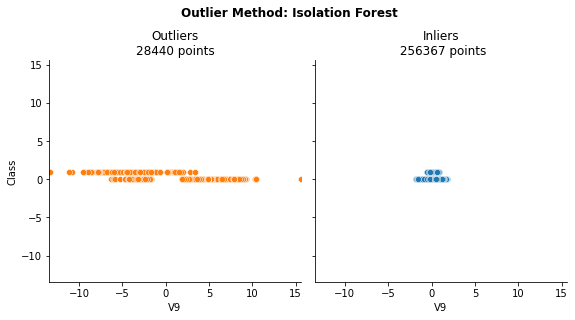

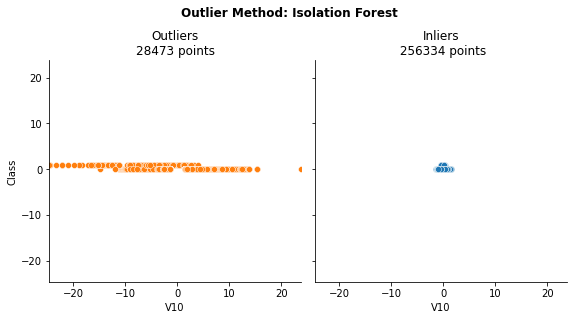

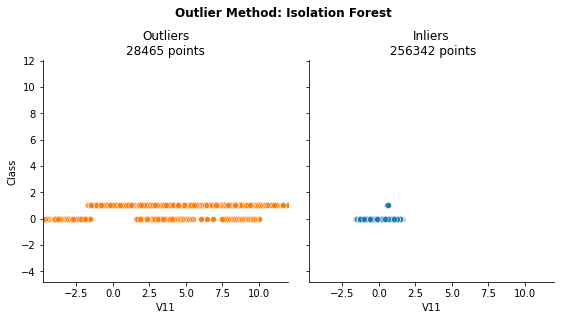

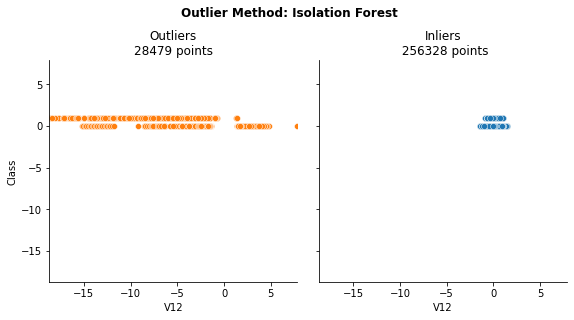

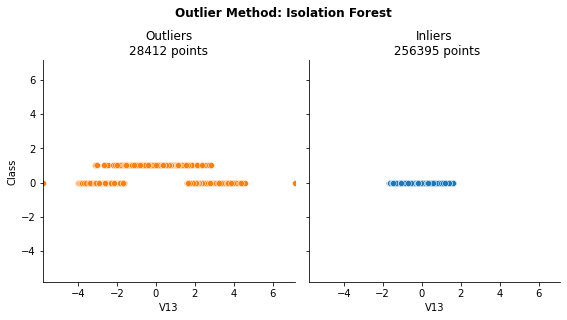

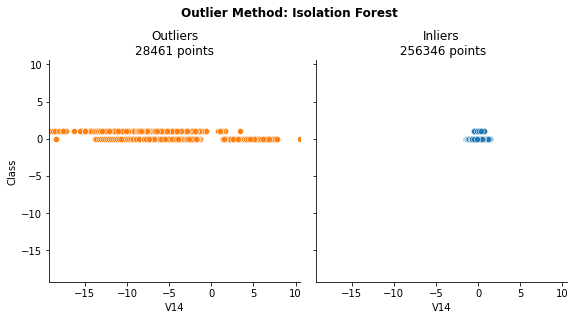

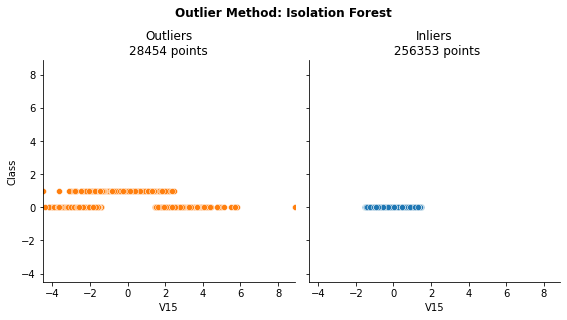

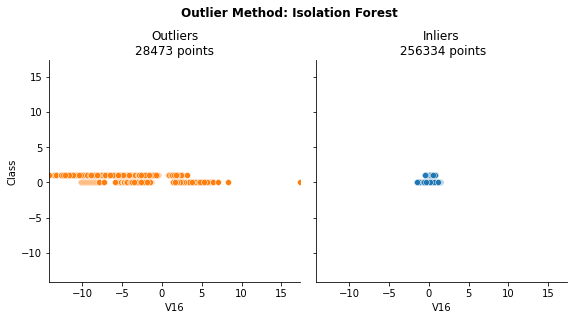

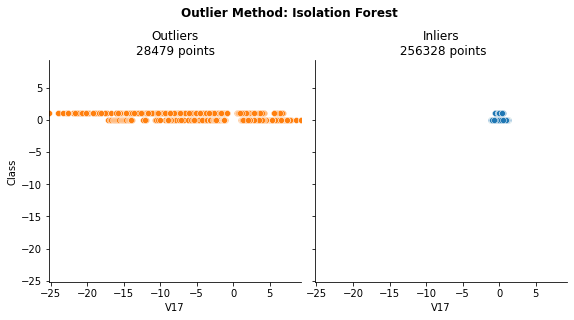

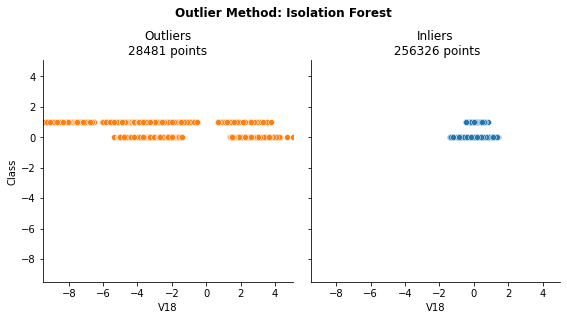

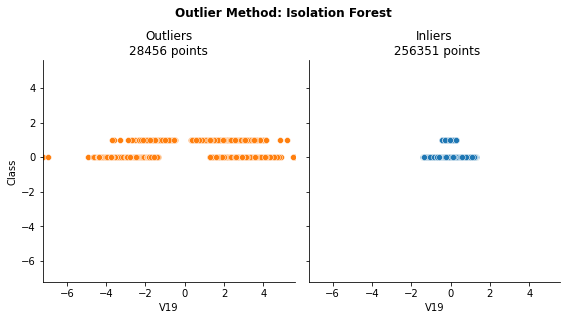

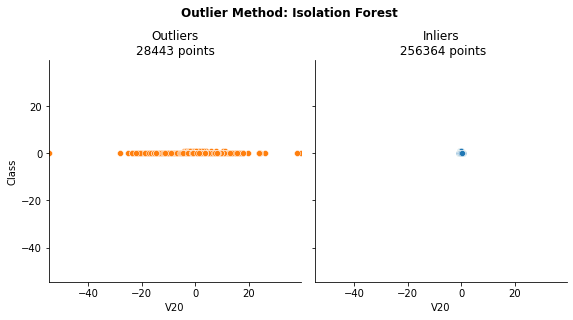

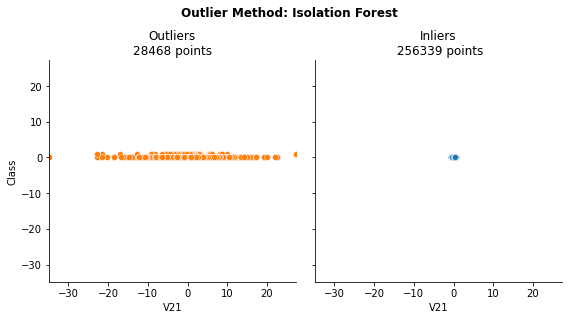

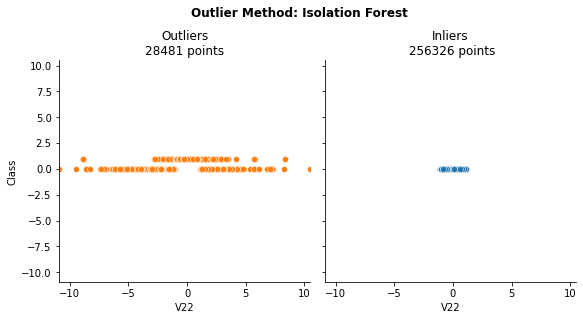

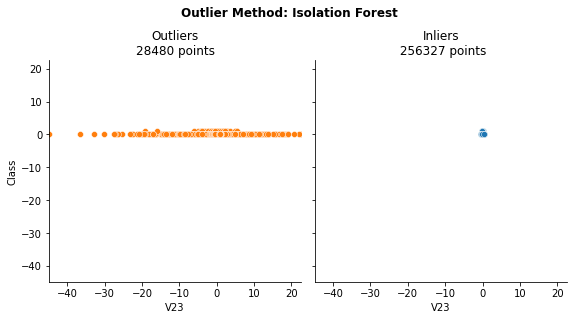

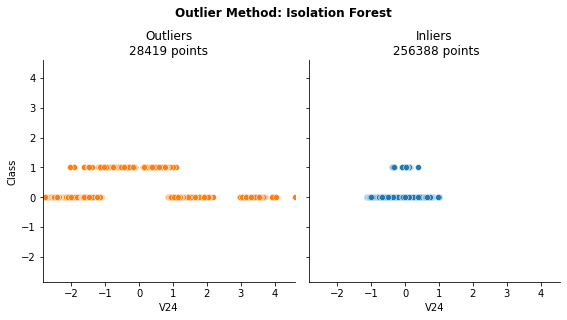

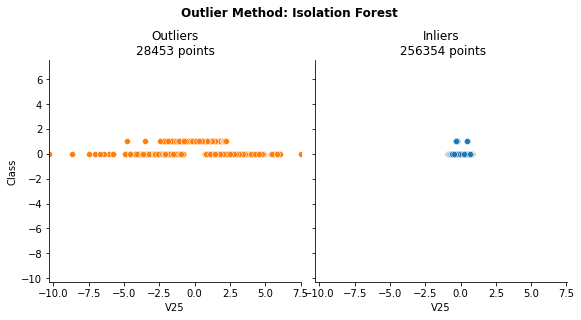

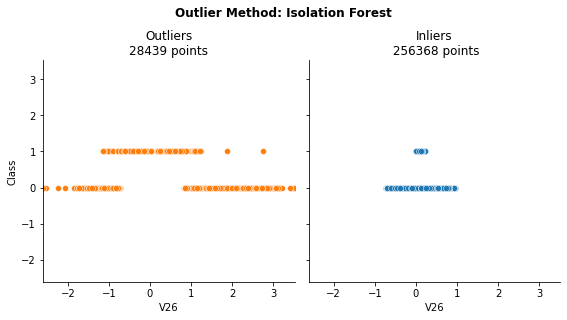

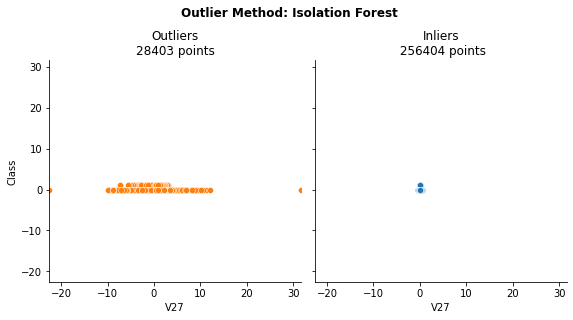

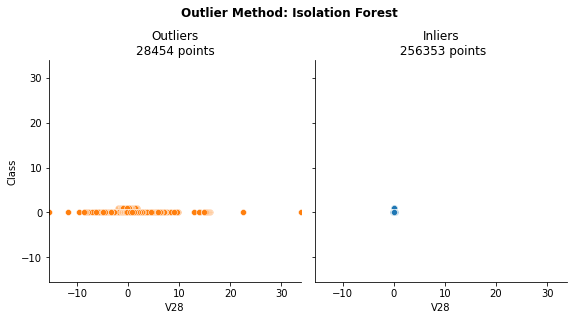

In [34]:
for col_name in col_names:
    calculate_for_colname(col_name, df)

# XGBOOST

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

transactions = pd.read_csv('Data/creditcard.csv')
transactions.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
from sklearn.model_selection import train_test_split

X, y = transactions.drop('Class', axis=1), transactions[['Class']]

In [6]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category

for col in cats:
   X[col] = X[col].astype('category')

In [7]:
 X.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [11]:
# Define hyperparameters

params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

In [12]:
n = 100

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

[13:34:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [13:34:32] C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

In [ ]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

In [ ]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

In [ ]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 100

In [ ]:
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

In [ ]:
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10 # Every ten rounds
)